# **Red and White Wine Quality Investigation**


done by Katherine Wang, Shio Huang, and Andy Liu for Data 144 final project.

# **0. About the Dataset**

**Source:**

Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009

https://archive.ics.uci.edu/ml/datasets/Wine+Quality

**Abstract**:

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal.

# **1. Exploratory Data Analysis**

**Import the libraries.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, normalize
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

**Import the dataset.**

In [ ]:
red_raw = pd.read_csv('winequality-red.csv', sep = ';')
white_raw = pd.read_csv('winequality-white.csv', sep = ';')

**Glance the basic information of the dataset.**

In [ ]:
red_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
white_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


From the above datasets, we can see that both red wine and white wine datasets contains 12 variables:
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
12 - quality (score between 0 and 10)

The first 11 variables are input variables that are elements of the wine, while the last one, "quality", is the output variable that determines the greatness of a bottle of wine.



Brief definition for the first 11 elements of the wine:

1 - fixed acidity: measurement of the non-volatile acids in wine that do not evaporate easily.

2 - volatile acidity: measurement of the volatile (or gaseous) acids in wine that can be smelled.

3 - citric acid: added to wine to increase acidity, complementing a specific flavor or preventing ferric hazes.

4 - residual sugar: natural grape sugars left in wine after the alcoholic fermentation process has finished.

5 - chlorides: a contributor to saltiness in wine.

6 - free sulfur dioxide: sulfur dioxide that is available to react in wine.

7 - total sulfur dioxide: contain both free and bound sulfur dioxide. The bound sulfur dioxide has reacted with other molecules in wine.

8 - density: measurement of the concentration of alcohol, sugar, glycerol, and other dissolved solids.

9 - pH: measurement of the level of acidity for a wine on a scale from 0 (very acidic) to 14 (very basic).

10 - sulphates: used as a yeast nutrient and nitrogen source and added to the grape must.

11 - alcohol: measurement of the alcohol level in wine.


**Now, let us explore values in each dataset.**

In [ ]:
red_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
white_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


The number of instances in the red and white wine datasets are different:

red wine: 1599
white wine: 4898.

**Data Cleaning.**

In [ ]:
red_raw[red_raw.isnull().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [ ]:
white_raw[white_raw.isnull().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Therefore, the dataset is very cleaned, without any null value or empty cells in the dataset. Luckily, there is no need to perform a lot of data cleaning work.

**Add bound sulfur dioxide to the dataset.**

Since total sulfur dioxide: contain both free and bound sulfur dioxide, adding a column for bound sulfur dioxide might lead to better understanding of the dataset.

In [ ]:
red_raw['bound sulfur dioxide'] = red_raw['total sulfur dioxide'] - red_raw['free sulfur dioxide']

In [ ]:
red_raw = red_raw[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'bound sulfur dioxide', 'total sulfur dioxide', 
                   'density', 'pH', 'sulphates', 'alcohol', 'quality']]

In [ ]:
white_raw['bound sulfur dioxide'] = white_raw['total sulfur dioxide'] - white_raw['free sulfur dioxide']

In [ ]:
white_raw = white_raw[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'bound sulfur dioxide', 'total sulfur dioxide', 
                   'density', 'pH', 'sulphates', 'alcohol', 'quality']]

**Explore variables based on quality.**

In [ ]:
target_red = red_raw['quality']
target_white = white_raw['quality']

In [ ]:
for quality in sorted(red_raw['quality'].unique()):
  count = len(red_raw[red_raw['quality'] == quality])
  print('The number of red wines of quality ' + str(quality) + ' is ' + str(count))

The number of red wines of quality 3 is 10
The number of red wines of quality 4 is 53
The number of red wines of quality 5 is 681
The number of red wines of quality 6 is 638
The number of red wines of quality 7 is 199
The number of red wines of quality 8 is 18


In [ ]:
for quality in sorted(white_raw['quality'].unique()):
  count = len(white_raw[white_raw['quality'] == quality])
  print('The number of white wines of quality ' + str(quality) + ' is ' + str(count))

The number of white wines of quality 3 is 20
The number of white wines of quality 4 is 163
The number of white wines of quality 5 is 1457
The number of white wines of quality 6 is 2198
The number of white wines of quality 7 is 880
The number of white wines of quality 8 is 175
The number of white wines of quality 9 is 5


We see that 

1) the number of wines of different quality were not evenly distributed, therefore we may need to categorize wines based on the range of quality so that the numbers of wines in different categories are roughly close.

2) white wines has the highest quality of 9 but red wine's quality in this dataset is as high as 8, while lowest is kept the same as value equals 3.

**Plot the dataset.**

For red wine:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

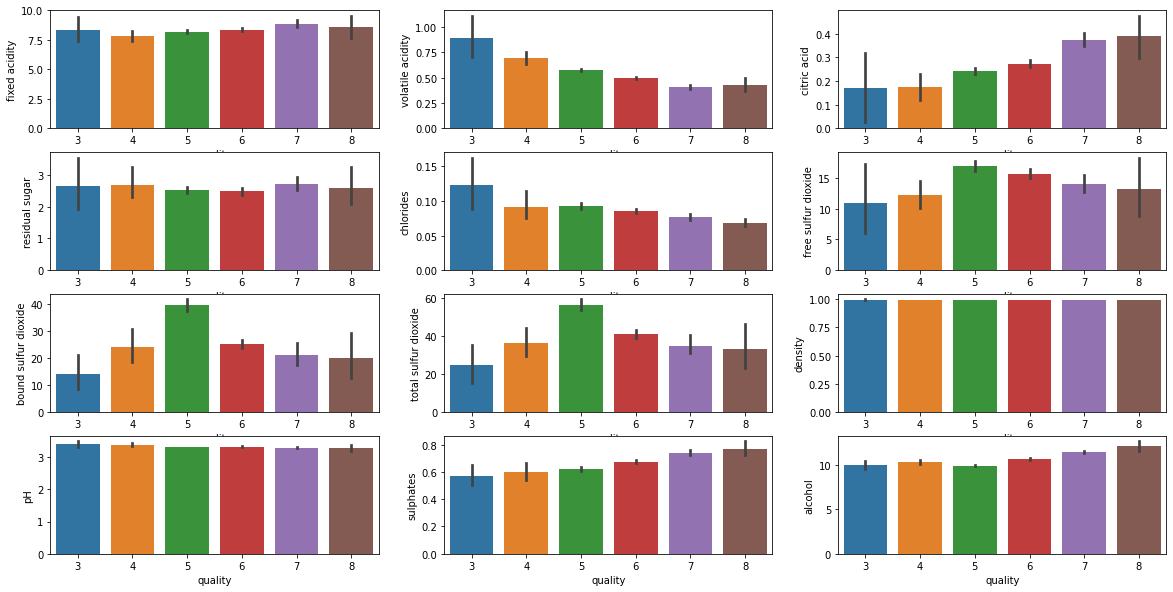

In [ ]:
plt.figure(figsize = (20, 10))
for i, column in enumerate(red_raw.columns[:-1]):
  plt.subplot(4, 3, i + 1)
  sns.barplot(target_red, red_raw[column])

For white wine:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

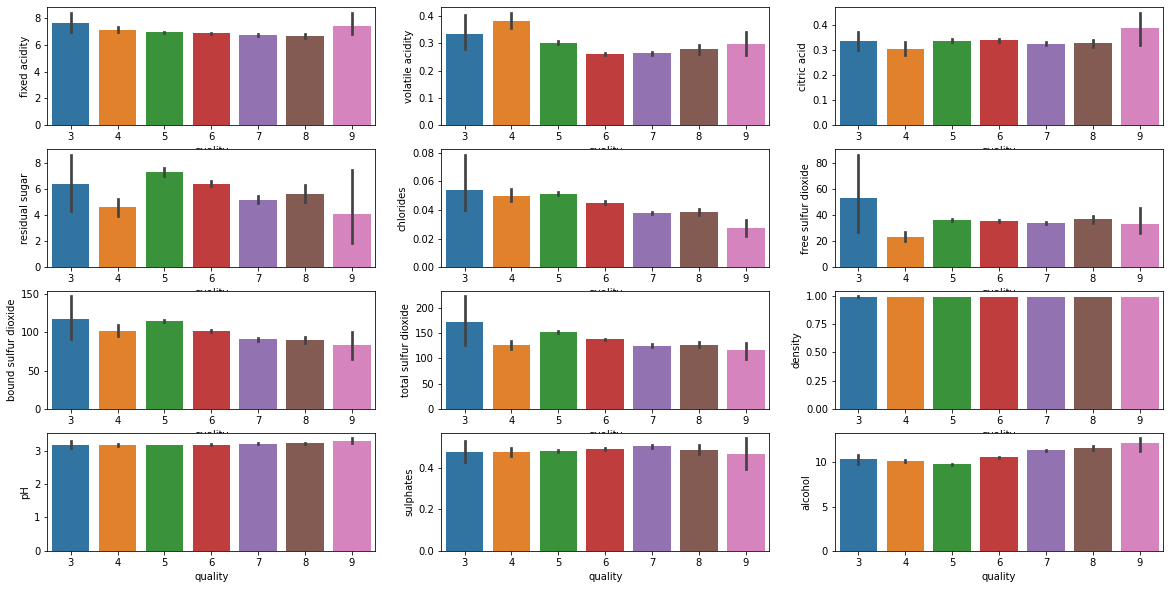

In [ ]:
plt.figure(figsize = (20, 10))
for i, column in enumerate(white_raw.columns[:-1]):
  plt.subplot(4, 3, i + 1)
  sns.barplot(target_white, white_raw[column])

From two above graphs, we see that for all qualities of wines (either red or white), density and pH almost keep the same without obvious variations, meeaning that they will not significantly affect the quality of a wine.

The distribution for free sulfur dioxide is almost identical with the total sulfur dioxide, while bound sulfur dioxide trend is very different, thus, to avoid redundant, total sulfur dioxide will be removed in feature consideration for models.

# **2. Feature Selection**

**Aim for the following exploratin:**

By comparing the above graphs, we have seen that red and white wines share some commons and also differs from each other. Therefore, we are interested in examining the accuracy for applying a red wine model on white wine. Will the prediction of quality be effective? How great will the model be?

1. Chlorides

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


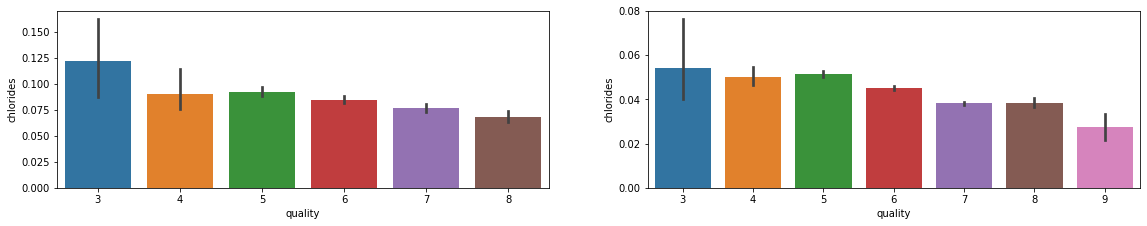

In [ ]:
plt.figure(figsize = (30, 15))
plt.subplot(4, 3, 1)
sns.barplot(target_red, red_raw['chlorides'])
plt.subplot(4, 3, 2)
sns.barplot(target_white, white_raw['chlorides'])

From this graph, it is clear to see that qualities of both wines have a negative relationship with the the level of chlorides.

2. Sulphates

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


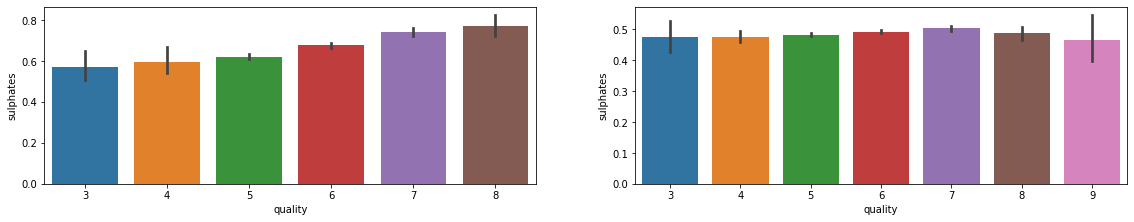

In [ ]:
plt.figure(figsize = (30, 15))
plt.subplot(4, 3, 1)
sns.barplot(target_red, red_raw['sulphates'])
plt.subplot(4, 3, 2)
sns.barplot(target_white, white_raw['sulphates'])

For red wine, higher quality wines usually have more sulphates, while for white wine this relationship is not salient since it slowly increases from quality of 3 to 7 then drops from quality 7 to 9.

3. Alcohol

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


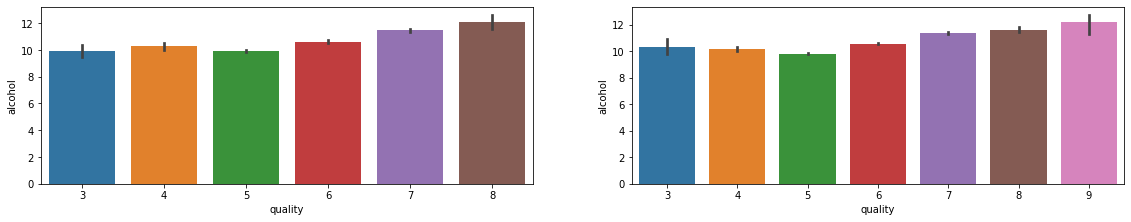

In [ ]:
plt.figure(figsize = (30, 15))
plt.subplot(4, 3, 1)
sns.barplot(target_red, red_raw['alcohol'])
plt.subplot(4, 3, 2)
sns.barplot(target_white, white_raw['alcohol'])

Alcohol concentration has generally positive relationship with quality for both wines. With 10 as a divide, wines that have alcohol concentration higher than 10 are expected to have higher quality.

In [ ]:
red_raw['high alcohol'] = (red_raw['alcohol'] > 10) * 1
white_raw['high alcohol'] = (white_raw['alcohol'] > 10) * 1

4. Volatile acidity

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


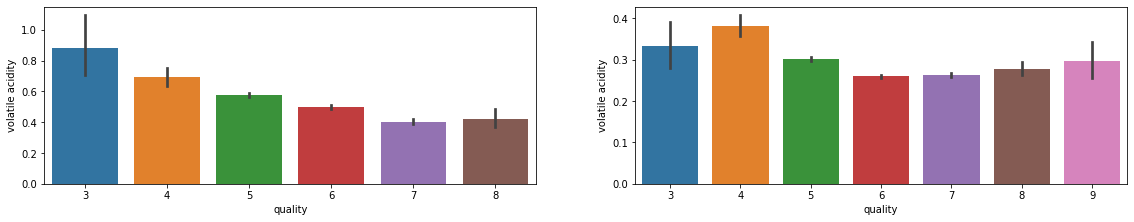

In [ ]:
plt.figure(figsize = (30, 15))
plt.subplot(4, 3, 1)
sns.barplot(target_red, red_raw['volatile acidity'])
plt.subplot(4, 3, 2)
sns.barplot(target_white, white_raw['volatile acidity'])

Volatile acidity has negative relationship with quality in red wine, but no obvious correlation in white wine.

5. Citric acid

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


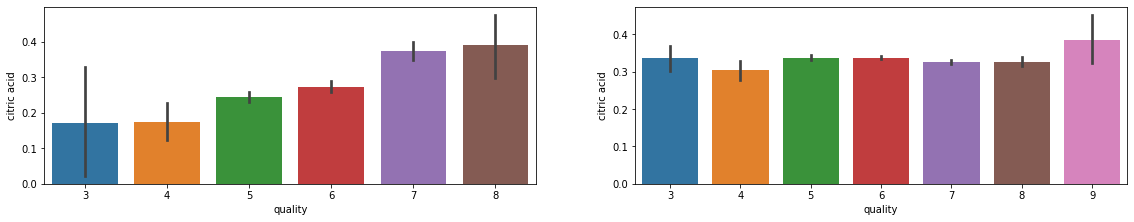

In [ ]:
plt.figure(figsize = (30, 15))
plt.subplot(4, 3, 1)
sns.barplot(target_red, red_raw['citric acid'])
plt.subplot(4, 3, 2)
sns.barplot(target_white, white_raw['citric acid'])

For red wine, higher quality wines usually have more citric acid, while for white wine this relationship is not salient.

6. Compare three kinds of acid.

For red wine:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


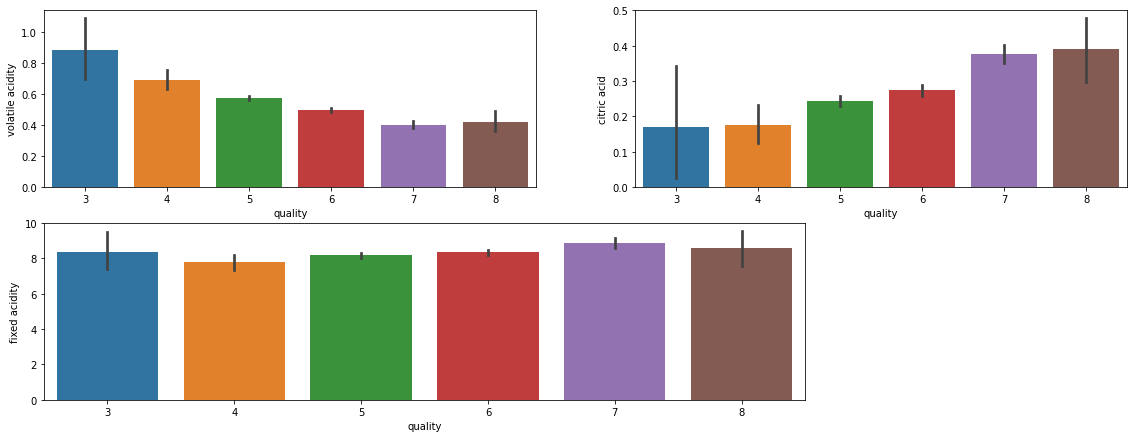

In [ ]:
plt.figure(figsize = (30, 15))
plt.subplot(4, 3, 1)
sns.barplot(target_red, red_raw['volatile acidity'])
plt.subplot(4, 3, 2)
sns.barplot(target_red, red_raw['citric acid'])
plt.subplot(4, 2, 3)
sns.barplot(target_red, red_raw['fixed acidity'])

For red wine, there is a clear trend that when quality increases, volatile acidity decreases and critic adid increases, while fixed acidity does not exhibit a clear trend.

For white wine:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


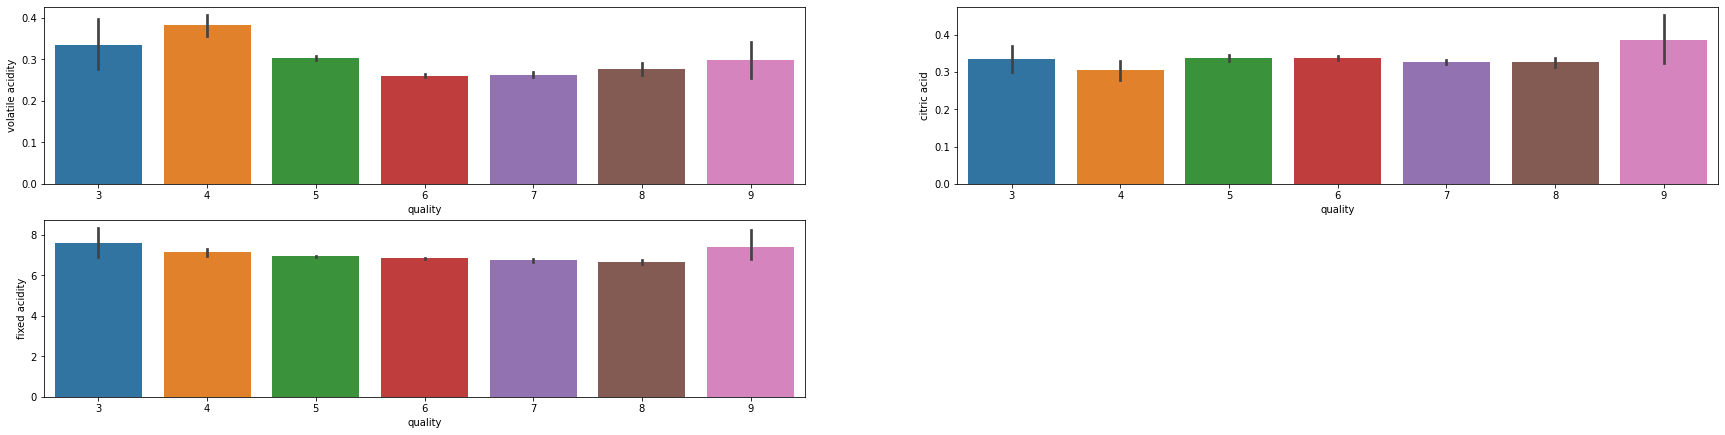

In [ ]:
plt.figure(figsize = (30, 15))
plt.subplot(4, 2, 1)
sns.barplot(target_white, white_raw['volatile acidity'])
plt.subplot(4, 2, 2)
sns.barplot(target_white, white_raw['citric acid'])
plt.subplot(4, 2, 3)
sns.barplot(target_white, white_raw['fixed acidity'])

For white wines, there is no clear relationship between the citric acid, volatile acidity and fixed acidity. However, for quality from 3 to 8, we can see that when volatile acidity increases, citric acid always decreases; and vice versa.

Overall, for two kinds of wines, they demonstrate that volatile acidity and citric acid are inversely related based on quality. Thus, there may be interconnection between those two variables. The model may not take both variables into consideration to avoid multicolinearity, so we proposees to add a new column callled acidity difference to combine these two variables.

**Acidity difference**

In [ ]:
red_raw['acidity difference'] = red_raw['volatile acidity'] - red_raw['citric acid']
white_raw['acidity difference'] = white_raw['volatile acidity'] - white_raw['citric acid']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


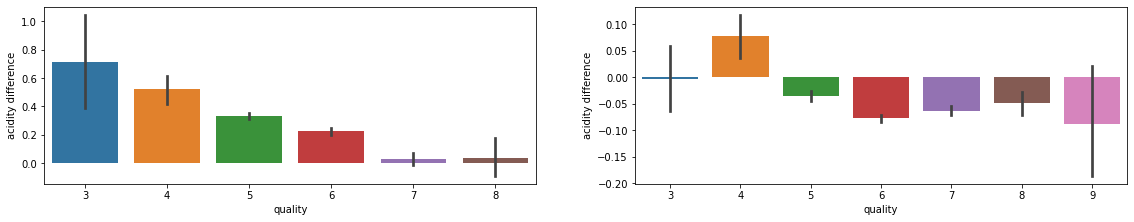

In [ ]:
plt.figure(figsize = (30, 15))
plt.subplot(4, 3, 1)
sns.barplot(target_red, red_raw['acidity difference'])
plt.subplot(4, 3, 2)
sns.barplot(target_white, white_raw['acidity difference'])

We see the new feature "acidity difference" has a salient relationship with our target in red, but the pattern is unclear for white.

# **3. Model Construction**

In [ ]:
X = red_raw.drop(['density', 'pH', 'quality', 'total sulfur dioxide', 'volatile acidity', 'citric acid'], axis = 1)
y_raw = target_red

Catogorize the qualities into three groups of low, average, and high based on the number of values in each quality group.

low: 3, 4, 5;
medium: 6;
high: 7, 8, 9.

In [ ]:
bins = (2, 4, 6, 9)
group_names = ['low', 'average', 'high']
y = pd.cut(y_raw, bins = bins, labels = group_names)

In [ ]:
y.value_counts()

average    1319
high        217
low          63
Name: quality, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

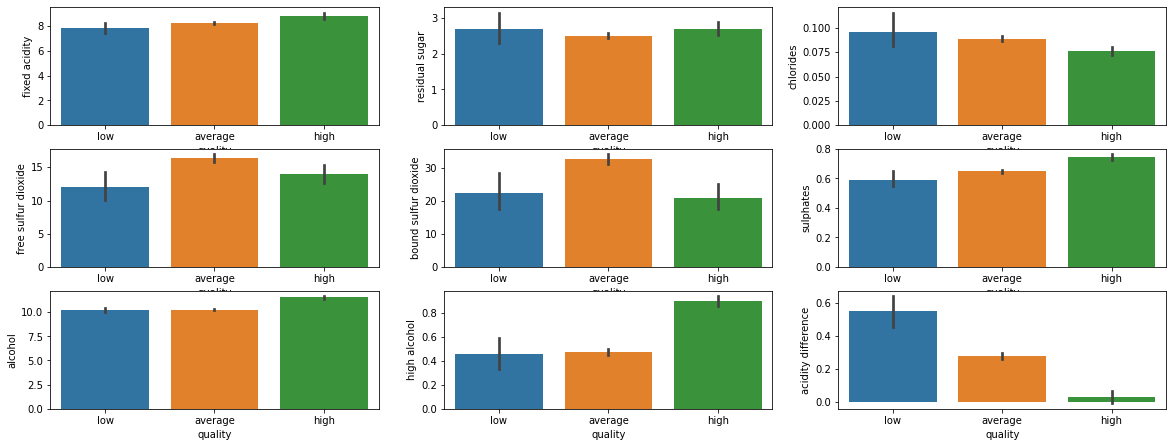

In [ ]:
plt.figure(figsize = (20, 10))
for i, column in enumerate(X.columns[:]):
  plt.subplot(4, 3, i + 1)
  sns.barplot(y, X[column])

By grouping quality into three categories, the same linear relationship demonstrated in the previous section for chlorides, sulphates, and alcohol is still present in the new graph. More importantly, fixed acidity, free sulphur dioxide, bound sulfur dioxide, acidity difference have demonsrated clear linear relationship that are not shwon in previous graph based on quality numbers. However, we will experiment with dropping alcohol since high alcohol has demonstrated a striking difference among three categories, compared to alcohol grpah. Also, the residual sugar column will be dropped too, since it does not demonstrate any kind of relationship with quality group, which means it is highly irrelevant to the prediction.



In [ ]:
red_raw = red_raw.drop('free sulfur dioxide', axis = 1)

In [ ]:
red_raw['sulfur saturation'] = (red_raw['bound sulfur dioxide'] > 25) * 1

## **I. Raw Decision Tree**

In [ ]:
X = red_raw.drop(['quality'], axis = 1)

In [ ]:
x1 = X

In [ ]:
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, x1, y, cv = 5)

In [ ]:
max(scores), np.mean(scores)

(0.765625, 0.7210775862068965)

## **II. Decision Tree with Feature Selection and Norminalization**

### **a. High Alcohol**

In [ ]:
x2a = X.drop(['density', 'pH', 'total sulfur dioxide', 'volatile acidity', 'citric acid'], axis = 1)
x2a = x2a.drop(['alcohol', 'residual sugar'], axis = 1)

In [ ]:
x2a.columns

Index(['fixed acidity', 'chlorides', 'bound sulfur dioxide', 'sulphates',
       'high alcohol', 'acidity difference', 'sulfur saturation'],
      dtype='object')

In [ ]:
x2a = normalize(x2a)

In [ ]:
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, x2a, y, cv = 5)

In [ ]:
max(scores), np.mean(scores)

(0.80625, 0.7529682601880878)

### **b. Alcohol**

In [ ]:
x2b = X.drop(['density', 'pH', 'total sulfur dioxide', 'volatile acidity', 'citric acid'], axis = 1)
x2b = x2b.drop(['high alcohol', 'residual sugar'], axis = 1)

In [ ]:
x2b = normalize(x2b)

In [ ]:
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, x2b, y, cv = 5)

In [ ]:
max(scores), np.mean(scores)

(0.8, 0.7467280564263323)

By comparing results from a and b, it seems that high alcohol is a better feature than alcohol.

## **III. Random Forest**

In [ ]:
x3 = x2a

In [ ]:
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, x3, y, cv = 5)

In [ ]:
max(scores), np.mean(scores)

(0.8375, 0.8173863636363636)

## **IV. sklearn.svm.SVC C-Support Vector Classification**

In [ ]:
x4 = x2a

In [ ]:
svc = SVC()
scores = cross_val_score(svc, x4, y, cv = 5)

In [ ]:
max(scores), np.mean(scores)

(0.825, 0.8248902821316614)

In [ ]:
best_estimator = [svc]

## **V. Neural Networks**

### **Model 1**

In [ ]:
x5a = x2a

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(30), activation = 'logistic', solver='lbfgs', random_state=42)
scores = cross_val_score(clf, x5a, y, cv = 5)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [ ]:
max(scores), np.mean(scores)

(0.840625, 0.814253526645768)

### **Model 2**

In [ ]:
x5b = x2a

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(20, 10, 3), activation = 'logistic', verbose=1,  learning_rate = 'adaptive', 
                    learning_rate_init = 0.001, max_iter=50, solver='lbfgs', random_state=42)
scores = cross_val_score(clf, x5b, y, cv = 5)

In [ ]:
max(scores), np.mean(scores)

(0.825, 0.8248902821316614)

In [ ]:
best_estimator.append(clf)

# **4. Apply the Model**

## **I. Apply the red wine model to white wine.**

 Based on our results from red wine dataset, SVC and Neural Network seem to provide the best estimation. We will now apply them to the white wine dataset.

In [ ]:
y_w = pd.cut(target_white, bins = bins, labels = group_names)

In [ ]:
# SVC
scores = cross_val_score(best_estimator[0], white_raw, y_w, cv = 5)
max(scores), np.mean(scores)

(0.7466802860061287, 0.7462231348106146)

In [ ]:
# Neural Network
scores = cross_val_score(best_estimator[1], white_raw, y_w, cv = 5)
max(scores), np.mean(scores)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

(0.7691521961184883, 0.7507175168330866)

**Investigate the White Wine Dataset**

In [ ]:
X_w = white_raw.drop(['density', 'pH', 'quality', 'total sulfur dioxide', 'volatile acidity', 'citric acid'], axis = 1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

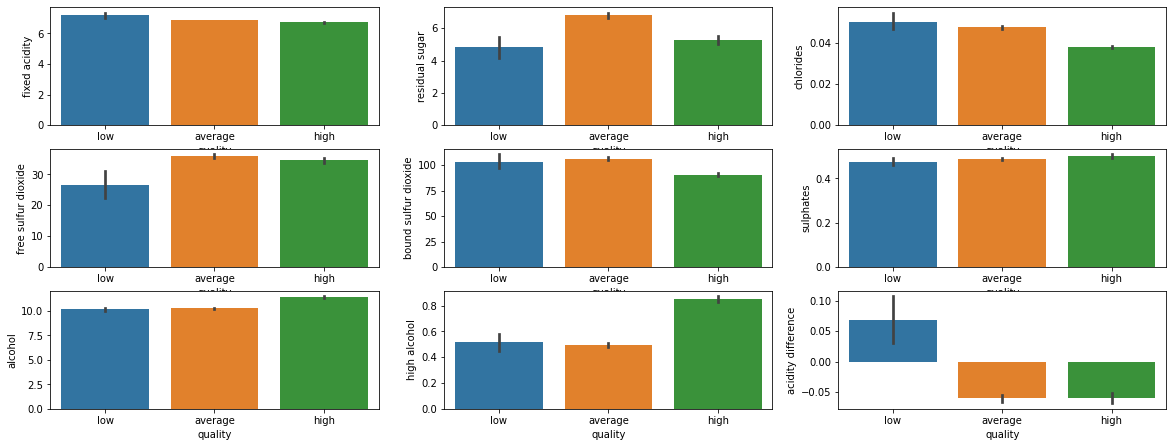

In [ ]:
plt.figure(figsize = (20, 10))
for i, column in enumerate(X_w.columns):
  plt.subplot(4, 3, i + 1)
  sns.barplot(y_w, X_w[column])

## **II. Raw Decision Tree**

In [ ]:
X_w = white_raw.drop(['quality'], axis = 1)

In [ ]:
x1_w = X_w

In [ ]:
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, x1_w, y_w, cv = 5)

In [ ]:
max(scores), np.mean(scores)

(0.7285714285714285, 0.6851695816222301)

## **III. Decision Tree with Feature Selection and Normalization**

In [ ]:
x2_w = X_w.drop(['density', 'sulphates', 'pH'], axis = 1)

In [ ]:
x2_w.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'bound sulfur dioxide',
       'total sulfur dioxide', 'alcohol', 'high alcohol',
       'acidity difference'],
      dtype='object')

In [ ]:
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, x2_w, y_w, cv = 5)

In [ ]:
max(scores), np.mean(scores)

(0.7438775510204082, 0.6951787538304393)

## **IV. Random Forest**

In [ ]:
x3_w = x2_w

In [ ]:
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, x3_w, y_w, cv = 5)

In [ ]:
max(scores), np.mean(scores)

(0.7908163265306123, 0.7637764482708302)

## **V. sklearn.svm.SVC C-Support Vector Classification**

In [ ]:
x4_w = x2_w

In [ ]:
svc = SVC()
scores = cross_val_score(svc, x4_w, y_w, cv = 5)

In [ ]:
max(scores), np.mean(scores)

(0.7466802860061287, 0.7462231348106146)

## **VI. Neural Networks**

### **Model 1**

In [ ]:
x5a_w = x2_w

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(30), activation = 'logistic', solver='lbfgs', random_state=42)
scores = cross_val_score(clf, x5a_w, y_w, cv = 5)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [ ]:
max(scores), np.mean(scores)

(0.7673469387755102, 0.7437633153363491)

### **Model 2**

In [ ]:
x5b_w = x2_w

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(20, 10, 3), activation = 'logistic', verbose=1,  learning_rate = 'adaptive', 
                    learning_rate_init = 0.001, max_iter=50, solver='lbfgs', random_state=42)
scores = cross_val_score(clf, x5b_w, y_w, cv = 5)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [ ]:
max(scores), np.mean(scores)

(0.7466802860061287, 0.7458149715453086)